In [2]:
#Titanic Tutorial Part 3
#Graphics Analysis
#Feature Reduction (Extraction/Selection)
#Filling in Missing Values

#For Part 3 of the Titanic Tutorial, complete Steps 14-15.

import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import numpy as np


#Step 1:  Load data into a dataframe
addr1 = "train.csv"
data = pd.read_csv(addr1)

In [4]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age'])

# check the result
print(data['Age'].describe())

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['Embarked'])

# check the result
print(data['Embarked'].describe())

# import package
import numpy as np

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['Fare_log1p'] = log_transformation(data['Fare'])

# check the data
#print(data.describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [5]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  


In [6]:

#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  623
No. of samples in validation set: 268


No. of survived and not-survived in the training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


/Users/jasoncorbaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


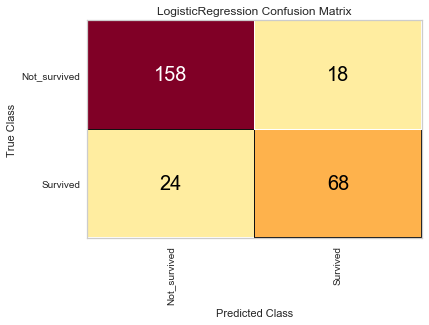

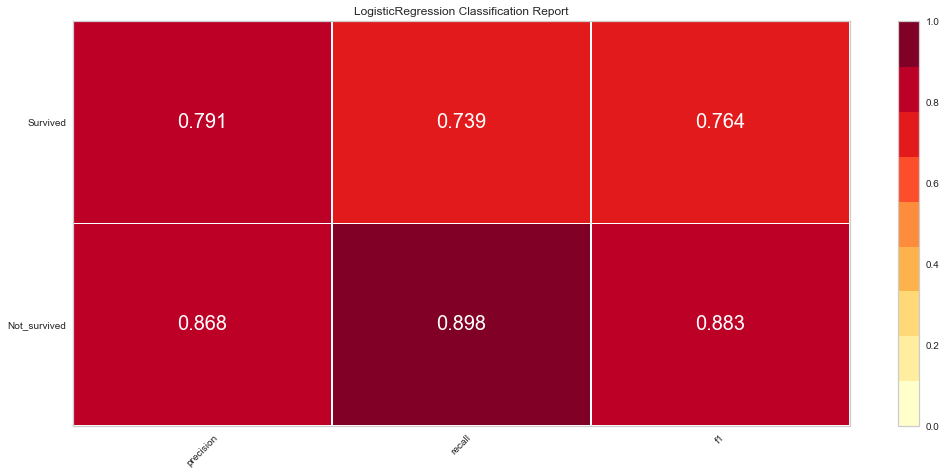

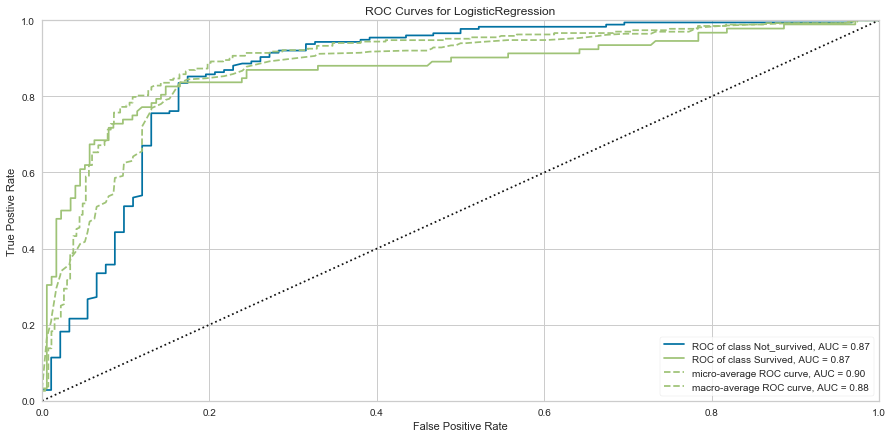

In [7]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()
